# Google Trends

In [38]:
#Setup and Import Required Libraries
from pytrends.request import TrendReq


pytrends = TrendReq(hl='en-US', tz=360, retries=3, backoff_factor=0.1 ) 

In [32]:
# build payload

keyword = "Cabernet" # list of keywords to get data 
year = 2011
timeframe = f'{year}-01-01 {year}-12-31' # time frame for data
pytrends.build_payload([keyword], cat=0, timeframe=timeframe) # build payload

In [33]:
data = pytrends.interest_over_time() 
data = data.reset_index() 



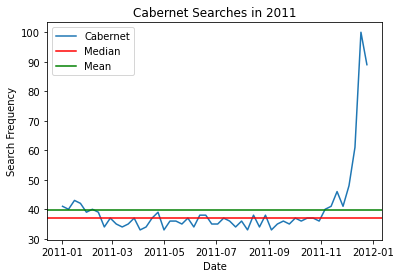

In [34]:
# plot the data 
import matplotlib.pyplot as plt
plt.plot(data['date'], data[keyword])
# add a median and average line
plt.axhline(y=data[keyword].median(), color='r', linestyle='-')
plt.axhline(y=data[keyword].mean(), color='g', linestyle='-')
# add a title and axis labels and legend
plt.title(f'{keyword} Searches in {year}')
plt.xlabel('Date')
plt.ylabel('Search Frequency')
plt.legend([keyword, 'Median', 'Mean'], loc='upper left')


In [11]:

import numpy as np
#Setup and Import Required Libraries
from pytrends.request import TrendReq
import statistics

# from selenium import webdriver
# import time
# def get_cookie():
#     options = webdriver.ChromeOptions()
#     options.add_argument("--headless")
#     driver = webdriver.Chrome(options=options)
#     driver.get("https://trends.google.com/")
#     time.sleep(5)
#     cookie = driver.get_cookie("NID")["value"]
#     driver.quit()
#     return cookie

# nid_cookie = f"NID={get_cookie()}"

Manuall cookies:

In [28]:
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Sec-Fetch-Site': 'same-origin',
    'Cookie': 'SIDCC=ACA-OxOnJOC7DS5KiRxIT_fR2QkEWCcC0qnRq2CsEQsF4Sys_RO_vNC35Crs2MB5YdXFgAsV; __Secure-1PSIDCC=ACA-OxP0ptWglmVe-8Y9UjZEA2PjryZYF9U8Da7mYl3v3-UARlu_SF6igP2ExrnNjJIq3n_0; __Secure-3PSIDCC=ACA-OxNgjKevY3Zow3HLaWD6avR6m0Vw9brDKI_2YZ1HqqVhrksBkErpBGhNVcwjaR90uCTacQ; __Secure-1PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; __Secure-3PSIDTS=sidts-CjIBNiGH7jHN0DIAoxvWfLffElvkiz4xuHvf4HlXznYgJbCKXTpI1Vd7cNt473ct6lIW0RAA; OTZ=7313007_52_52_123900_48_436380; APISID=rGw9b4LlhUzdu9JK/A5FCfs42fPt9ML6c_; HSID=AyERsaCQdeoOCSTaz; NID=511=X8aF5DKahzhIfJnmosQ1ObPEG8zuH2izcRIKsuqYeEylpV2ZHP3pSelOtraRPMq4pgy2wjm7kxo6c7lmnqSxHev6GySI8oINAQB_awzDtax9YDqHEShrtK_WLysYWiVDRMvy_LrNkEmF8G2N13timw27rWOVsasND3EDY4hkYo3oliLUp5CZL3xjGC_M2hz2JvuR5I-ICNWpO32rj4F_ocrG43zfkegl5cJHGT2MCiSUriZCbxP1kaMBPQTG-_Y4JTRakj4E; SAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; SID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3PQihDzktg1v-0nRdHwAujA.; SSID=Agfst-sFEI8JQacAA; __Secure-1PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-1PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3nqCQMxgz8872_h16xzPhcA.; __Secure-3PAPISID=xtm7yO5yqBMIfMO_/AraNHIFdvZpGK-nKQ; __Secure-3PSID=dQitCu_1-9kn51deqjTS85Cx8dHgq3zcTMHZonuWCvwC6Ty3BncuJgujlOIb3nvCSH52zQ.',
    'Sec-Fetch-Dest': 'document',
    'Accept-Language': 'en-gb',
    'Sec-Fetch-Mode': 'navigate',
    'Host': 'trends.google.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Safari/605.1.15',
    'Referer': 'https://trends.google.com/',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [29]:


# lets build a function to get the data for a list of keywords
def get_trend_data(keyword, year):
    time.sleep(1)
    pytrends = TrendReq(hl='en-US', tz=360, retries=3, backoff_factor=0.1, requests_args={"headers": headers}) 
    timeframe = f'{year}-01-01 {year}-12-31'
    if int(year) < 2004:
        return np.nan, np.nan
    else:
        try:
            pytrends.build_payload([keyword], cat=0, timeframe=timeframe)
            data = pytrends.interest_over_time()
            return data.loc[:, keyword].tolist()
        except:
            time.sleep(1)
            return np.nan, np.nan

def get_aggregates(data):
    return statistics.median(data), statistics.mean(data)


In [81]:

m, n = get_aggregates(get_trend_data("Cabernet", 2011))

# Wine Quality

In [88]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import pyarrow

In [94]:
wine_quality = fetch_ucirepo(id=186) 
df = pd.DataFrame(wine_quality.data.original)

# save data to parquet
df.to_parquet('wine_quality.parquet')

# Harvest data

In [36]:
import faostat
import pandas as pd 

## offline

In [32]:
#Offline:
#faostat.list_pars('QCL')
#grapes = faostat.get_data_df('QCL', pars={'item':'560'}, show_flags=True, null_values=True)
#wine = faostat.get_data_df('QCL', pars={'item':'564'}, show_flags=True, null_values=True)
# save data to parquet
#grapes.to_parquet('grapes.parquet')
#wine.to_parquet('wine.parquet')


In [33]:
# load data from parquet
import pandas as pd
import pyarrow
grapes = pd.read_parquet('grapes.parquet')
wine = pd.read_parquet('wine.parquet')


In [34]:
# get the data from the df grapes for the year 2011 and the area Argentina
#make this a def function
def get_data(df, year, area):
    return df.loc[(df['Year'] == str(year)) & (df['Area'] == area)]

# make def to get data of Column "Value" for Element = "Area harvested"
def get_value(df, element):
    return float(df.loc[df['Element'] == element]['Value'])

# make def to get three values for a country and year
def get_three_values(grapes, wine, country, year):
    df1 = get_data(grapes, year, country)
    df2 = get_data(wine, year, country)
    return get_value(df1, 'Area harvested'), get_value(df1, 'Production'), get_value(df2, 'Production')

# get three values for a country and year
get_three_values(grapes, wine, 'Italy', '2019')



(697910.0, 7900120.0, 4985862.0)

## Online

In [37]:
#online:
# make a def to get data for a country and year
def get_country_data(country, year):
    name_dict = faostat.get_par('QCL', 'area')
    df1 = faostat.get_data_df('QCL', pars={'item':'560', 'area':name_dict[country], 'year':year}, show_flags=True, null_values=True)
    df2 = faostat.get_data_df('QCL', pars={'item':'564', 'area':name_dict[country], 'year':year}, show_flags=True, null_values=True)
    return df1,df2

d1,d2 = get_country_data('Italy', '2019')

Yield is the Production divided by the Area harvested, so we only need 2 out of 3 for the first dataframe
and we only need Production for Wine

In [38]:
# make def to get data of Column "Value" for Element = "Area harvested"
def get_value(df, element):
    return float(df.loc[df['Element'] == element]['Value'])

# make def to get three values for a country and year
def get_three_values(country, year):
    df1, df2 = get_country_data(country, year)
    return get_value(df1, 'Area harvested'), get_value(df1, 'Production'), get_value(df2, 'Production')

# get three values for a country and year
get_three_values('Italy', '2019')

(697910.0, 7900120.0, 4985862.0)

# Weather Data
meteostat vs open-meteo

In [41]:
import numpy as np 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

from datetime import datetime
from meteostat import  Daily, Stations


In [42]:
# function to find the coordinate of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome the exception thrown by geolocator 
    try:  
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city, language='en') 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     


In [43]:
# make def to return latitude and longitude for a city given a country (more reliable because sometimes the same city name exists in different countries)
def get_lat_long(city, country):
    if findGeocode(city) != None: 
        if findGeocode(city).raw["display_name"].split(", ")[-1] == country:
            return findGeocode(city).latitude, findGeocode(city).longitude
        #return findGeocode(city).latitude, findGeocode(city).longitude
    else:
        # open csv file and append the data city to clean it later
        with open('log.csv', 'a') as f:
            # format: City: "city", Country: "country", Date: "date" (only date, not time)
            f.write("City: " + city + ", Country: " + country + ", Date: " +str(datetime.today().strftime('%d-%m-%Y')) + '\n')
        return np.nan, np.nan

In [44]:
# average a df per column based on a multiindex if its non empty
def average_df(df):
    if not df.empty:
        df = df.groupby(level=1).mean()
    return df

# make def to get data based on a city and year from the n nearest stations
def get_weather(city, country, year, n):
    start = datetime(int(year), 1, 1)
    end = datetime(int(year), 12, 31)

    lat, lon = get_lat_long(city,country)
        # check if not nan
    if np.isnan(lat) or np.isnan(lon):
        # break if nan
        return np.nan
    else:
        stations = Stations()
        stations = stations.nearby(lat, lon)
        station = stations.fetch(n)
        data = Daily(station, start, end)
        data = data.fetch()
        return average_df(data)

### Reduce to growth period

In [45]:
df = get_weather('Bordeaux', 'France', 2019, 5)

In [46]:
# get df for certain time frame based on index
def get_growth_period(df, start, end):
    return df.loc[start:end]
#Growth period: may 11th - september 20th 
#https://en.wikipedia.org/wiki/Harvest_(wine)
#df = get_growth_period(df, '2019-03-11', '2019-09-20')

### get volatility

In [47]:
# get volatility of a single column
def get_volatility(df, column):
    return df[column].std()/df[column].mean()


### Longest drought

In [48]:
# get the longest consecutive sequence of a value in a df
def longest_sequence(df, column, value):
    return df[column].eq(value).astype(int).groupby(df[column].ne(value).cumsum()).sum().max()


### Longest rain period

In [49]:
# get the longest consecutive sequence of the absence (!) of a value in a df
# this is the longest sequence of days with rain
def longest_sequence_no(df, column, value):
    return df[column].ne(value).astype(int).groupby(df[column].eq(value).cumsum()).sum().max()

### Avg Rain

In [50]:
#Vines need between 400 and 600 mm of rain per year. 
#A regular supply of water throughout the growth cycle is needed for a high quality crop.
#https://www.idealwine.info/conditions-necessary-great-wine-part-12/
# get the avg of the column prcp for a df
def get_avg_prcp(df):
    return df['prcp'].mean()

### No of Days above 35 degrees 

In [51]:
#At temperatures below 10°C and above 35°C, photosynthesis will be disrupted and vines will not grow properly.
# count number of rows in a df column tmax above a threshold
def count_above(df, column, threshold):
    return df[df[column] > threshold][column].count()

### number of days below 10 degrees


In [52]:
# count number of rows in a df column tmax under a threshold

def count_under(df, column, threshold):
    return df[df[column] < threshold][column].count()

### coulure wspd

In [53]:
#strong wind around june --> coulure 
# get the avg of the column wspd for a df
def get_avg_wspd(df):
    year = df.index[0].year
    df = get_growth_period(df, f'{year}-05-15', f'{year}-07-15')
    return df['wspd'].mean()

### May July Rain

In [54]:
#Too much rain during the May-July period --> diseases such as mildew or oidium
# sum the column prcp for a df
def get_sum_prcp(df):
     year = df.index[0].year
     df = get_growth_period(df, f'{year}-05-15', f'{year}-07-15')
     return df['prcp'].sum()

## Combined Features
```
Temp Vola: get_volatility(df, 'tavg')
Rain Vola: get_volatility(df, 'prcp')
Longest drought: longest_sequence(df, 'prcp', 0)
Longest Rain: longest_sequence_no(df, 'prcp', 0) 
Avg Rain: get_avg_prcp(df)
NoDays35: count_above(df, 'tmax', 35)
NoDays10: count_under(df, 'tmin', 10)
NoDays0: count_under(df, 'tmin', 0)
ColourWspd: get_avg_wspd(df)
MayJulyRain: get_sum_prcp(df)
```

In [55]:
# combine all function in one function

def get_weather_features(city, country, year, n):
    raw = get_weather(city, country, year, n)
    if raw is np.nan:
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        df = get_growth_period(raw, f'{year}-03-11', f'{year}-09-20')
        return get_volatility(df, 'tavg'), get_volatility(df, 'prcp'), longest_sequence(df, 'prcp', 0), longest_sequence_no(df, 'prcp', 0), get_avg_prcp(df), count_above(df, 'tmax', 35), count_under(df, 'tmin', 10), count_under(df, 'tmin', 0), get_avg_wspd(df), get_sum_prcp(df)

#### Example:

In [22]:
Vola_Temp, Vola_Rain, Longest_Dry, Longest_Wet, Avg_Rain, Count_above35, Count_under10, Count_under0, Coulure_Wind, June_Rain = get_weather_features('Bordeaux','France', 2019, 5)


In [23]:
Vola_Temp, Vola_Rain, Longest_Dry, Longest_Wet, Avg_Rain, Count_above35, Count_under10, Count_under0, Coulure_Wind, June_Rain = get_weather_features('bhibv','France', 2019, 5)


# Test

In [8]:
import pandas as pd
# load drafts/df_out.csv
df = pd.read_csv('df_out.csv')

In [21]:
test = df[0:10]
test.head(1)

,Unnamed: 0,ID,Winery,Name,Vintage,Country,Region,Wine_Style,Wine_Type,Wine_Category,Grape Type,Grape_ID,Rating,Review_Count,Price,Acidity,Fizziness,Intensity,Sweetness,Tannin
0,0,Harlequin 2016,Zýmē,Harlequin,2016,Italy,Veneto,northern-italy-red,Red,Red,Teroldego,35,0.0,22,289.98,2.656454,NaN,4.08273,2.438897,3.08046


## Weather

In [62]:
#loop through test dataframe with iterrows
results = []
for index, row in test.iterrows():
    #print(row['Region'], row['Vintage'])
    tupel = [row['Region'], int(row['Vintage'])]
    tupel.extend(get_weather_features(row['Region'], row['Country'], row['Vintage'], 5))
    #print(tupel)
    #print('------------------------')
    results.append(tupel)

# create a new df with the results
df_results = pd.DataFrame(results, columns=['Region', 'Vintage', 'Vola_Temp', 'Vola_Rain', 'Longest_Dry', 'Longest_Wet', 'Avg_Rain', 'Count_above35', 'Count_under10', 'Count_under0', 'Coulure_Wind', 'June_Rain'])

Veneto 2016


['Veneto', 2016, 0.2761934099931723, 2.455692704383407, 23, 8, 2.6000000000000005, 0, 32, 0, 10.607258064516126, 194.79999999999998]
------------------------
Amarone della Valpolicella Classico 2017
['Amarone della Valpolicella Classico', 2017, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
------------------------
Vigneti delle Dolomiti 2003
['Vigneti delle Dolomiti', 2003, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
------------------------
Veneto 2019
['Veneto', 2019, 0.3146901187661715, 2.368641473203825, 13, 7, 4.560416666666666, 1, 45, 0, 8.88978494623656, 323.19999999999993]
------------------------
Vigneti delle Dolomiti 1998
['Vigneti delle Dolomiti', 1998, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
------------------------
Vigneti delle Dolomiti 2018
['Vigneti delle Dolomiti', 2018, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
------------------------
Vigneti delle Dolomiti 2007
['Vigneti delle Dolomiti', 2007, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [58]:
df_results.dropna(inplace=True)
df_results

,Region,Vintage,Vola_Temp,Vola_Rain,Longest_Dry,Longest_Wet,Avg_Rain,Count_above35,Count_under10,Count_under0,Coulure_Wind,June_Rain
0,Veneto,2016,0.276193,2.455693,23.0,8.0,2.600000,0.0,32.0,0.0,10.607258,194.8
3,Veneto,2019,0.314690,2.368641,13.0,7.0,4.560417,1.0,45.0,0.0,8.889785,323.2
9,Trentino-Alto Adige,2018,0.566535,2.090728,12.0,6.0,2.874432,0.0,123.0,23.0,10.544355,191.9


## Google trends

Even though we use custom cookies and headers, there are still issues with google trends and this will take significant amounts of time and re-runs

In [61]:
#loop through test dataframe with iterrows
results = []
for index, row in test.iterrows():
    #print(row['Grape Type'], row['Vintage'])
    tupel = [row['Grape Type'], int(row['Vintage'])]
    tupel.extend(get_aggregates(get_trend_data(row['Grape Type'], row['Vintage'])))
    #print(tupel)
    #print('------------------------')
    results.append(tupel)

# create a new df with the results
df_results = pd.DataFrame(results, columns=['Grape Type', 'Vintage', 'Median', 'Mean'])
df_results.dropna(inplace=True)
df_results

Teroldego 2016
['Teroldego', 2016, 42.0, 45.34615384615385]
------------------------
Teroldego 2017
['Teroldego', 2017, 56, 57.84905660377358]
------------------------
Teroldego 2003
['Teroldego', 2003, nan, nan]
------------------------
Teroldego 2019
['Teroldego', 2019, 38.0, 39.17307692307692]
------------------------
Teroldego 1998
['Teroldego', 1998, nan, nan]
------------------------
Teroldego 2018
['Teroldego', 2018, 48.5, 49.13461538461539]
------------------------
Teroldego 2007
['Teroldego', 2007, 23.0, 24.615384615384617]
------------------------
Teroldego 2013
['Teroldego', 2013, 0.0, 15.5]
------------------------
Teroldego 2019
['Teroldego', 2019, 38.0, 39.17307692307692]
------------------------
Teroldego 2018
['Teroldego', 2018, 48.5, 49.13461538461539]
------------------------


,Grape Type,Vintage,Median,Mean
0,Teroldego,2016,42.0,45.346154
1,Teroldego,2017,56.0,57.849057
3,Teroldego,2019,38.0,39.173077
5,Teroldego,2018,48.5,49.134615
6,Teroldego,2007,23.0,24.615385
7,Teroldego,2013,0.0,15.500000
8,Teroldego,2019,38.0,39.173077
9,Teroldego,2018,48.5,49.134615


## Harvest

In [63]:
#loop through test dataframe with iterrows
results = []
for index, row in test.iterrows():
    #print(row['Grape Type'], row['Vintage'])
    tupel = [row['Country'], int(row['Vintage'])]
    tupel.extend(get_three_values(row['Country'], row['Vintage']))
    #print(tupel)
    #print('------------------------')
    results.append(tupel)

# create a new df with the results
df_results = pd.DataFrame(results, columns=['Country', 'Vintage', 'Area harvested', 'Grape Production', 'Wine Production'])
df_results.dropna(inplace=True)
df_results

,Country,Vintage,Area harvested,Grape Production,Wine Production
0,Italy,2016,668087.0,8201913.6,5161546.0
1,Italy,2017,670085.0,7169745.0,4382936.0
2,Italy,2003,835546.0,7482936.0,4408611.0
3,Italy,2019,697910.0,7900120.0,4985862.0
4,Italy,1998,874390.0,9256801.0,5714040.0
5,Italy,2018,675820.0,8513640.0,5415000.0
6,Italy,2007,782000.0,7392543.0,4094326.0
7,Italy,2013,702106.0,8010364.2,4504412.0
8,Italy,2019,697910.0,7900120.0,4985862.0
9,Italy,2018,675820.0,8513640.0,5415000.0
